FOOD101 PROJECT

The project is about prediction of name of food items based on their images using TRANSFER LEARNING concept

In [1]:
!git clone https://github.com/Bhavnoor-Coders-1010/food101.git

Cloning into 'food101'...
remote: Enumerating objects: 6220, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 6220 (delta 1), reused 16 (delta 1), pack-reused 6200 (from 4)
Receiving objects: 100% (6220/6220), 169.23 MiB | 23.18 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (6256/6256), done.


In [2]:
%cd food101

/content/food101


Here we are trying to upload the two CSV files train.csv and test.csv to train and test the model respecteively

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.applications import VGG16

Here I tried to show how the csv files look like and and printed one image each from train and test csv files

  imagePath  label
0  0342.jpg      2
1  1077.jpg      0
2  2314.jpg     11
3  3068.jpg      0
4  4121.jpg     13
   Unnamed: 0 imagePath  label
0           0  0205.jpg      5
1           1  1134.jpg      3
2           2  2231.jpg      5
3           3  3401.jpg      4
4           4  4280.jpg     10


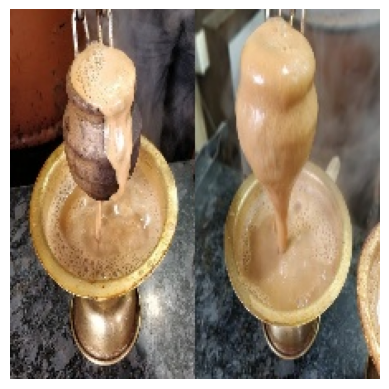

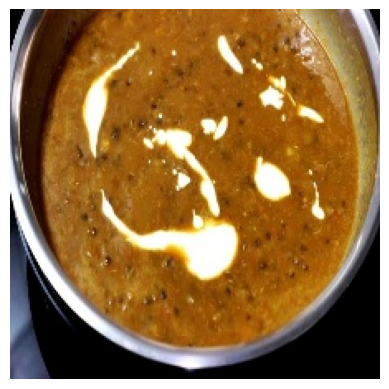

In [6]:
df = pd.read_csv('train.csv')
train_df=df.copy()
df_2 = pd.read_csv('test.csv')
test_df=df_2.copy()

print(train_df.head())

print(test_df.head())


image_folder_train = 'DataFOOD101/Train/'
image_folder_test = 'DataFOOD101/Test/'


image_name_train = train_df.iloc[0]['imagePath']
image_name_test = test_df.iloc[0]['imagePath']

image_path_train = os.path.join(image_folder_train, image_name_train)
image_path_test = os.path.join(image_folder_test, image_name_test)

img_train = cv2.imread(image_path_train)
img_test = cv2.imread(image_path_test)

img_rgb_train = cv2.cvtColor(img_train, cv2.COLOR_BGR2RGB)
img_rgb_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb_train)
plt.axis('off')
plt.show()

plt.imshow(img_rgb_test)
plt.axis('off')
plt.show()

In this code using the function os.path.join() was necessary because the CSV files only had link to the images but the other file that was provided had no link but name of the image link like img.jpg and corresponding class. Basically img.jpg was not a path but simply a name. so I used the function to connect the path to its class.

Also I resized the images to 160x160

In [7]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

image_folder_train = 'DataFOOD101/Train/'
image_folder_test = 'DataFOOD101/Test/'

train_images_resized = []
train_labels = []

oh = OneHotEncoder()

for image_name in os.listdir(image_folder_train):
    image_path = os.path.join(image_folder_train, image_name)
    matching_row = train_df[train_df['imagePath'] == image_name]

    label = matching_row.iloc[0]['label']
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, (160,160))
    train_images_resized.append(resized_img)
    train_labels.append(label)

X_train = np.array(train_images_resized)
y_train = np.array(train_labels)

test_images_resized = []
test_labels = []

for image_name in os.listdir(image_folder_test):
    image_path = os.path.join(image_folder_test, image_name)

    matching_row = test_df[test_df['imagePath'] == image_name]


    label = matching_row.iloc[0]['label']
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, (160,160))
    test_images_resized.append(resized_img)
    test_labels.append(label)

X_test = np.array(test_images_resized)
y_test = np.array(test_labels)

y_test_encoded = oh.fit_transform(y_test.reshape(-1, 1)).toarray()

print(X_train.shape)
print(X_test.shape, y_test_encoded.shape)
print(y_train.shape,y_test.shape)

(5314, 160, 160, 3)
(939, 160, 160, 3) (939, 20)
(5314,) (939,)


In [8]:
n_validation = 200

X_validation = X_train[-n_validation:]
y_validation = y_train[-n_validation:]

X_train = X_train[:-n_validation]
y_train = y_train[:-n_validation]

y_train_encoded=oh.fit_transform(y_train.reshape(-1,1)).toarray()
new_yval = oh.fit_transform(y_validation.reshape(-1, 1)).toarray()

The base model that is used here is VGG16 which is a pre trained model. This is being used to increase the accuracy of the overall model.

In [9]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(160, 160, 3))

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(90, activation='relu'),
    layers.Dense(20, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
X_train_normalized = X_train / 255.0
X_validation_normalized = X_validation / 255.0

n_epochs=15
batch_size=100

history = model.fit(X_train_normalized, y_train_encoded,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    validation_data=(X_validation_normalized, new_yval))

Epoch 1/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 37s 324ms/step - accuracy: 0.1453 - loss: 2.8500 - val_accuracy: 0.3400 - val_loss: 2.3767
Epoch 2/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 209ms/step - accuracy: 0.4006 - loss: 2.1557 - val_accuracy: 0.4850 - val_loss: 1.8926
Epoch 3/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 209ms/step - accuracy: 0.5273 - loss: 1.6606 - val_accuracy: 0.4850 - val_loss: 1.7134
Epoch 4/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - accuracy: 0.5938 - loss: 1.3901 - val_accuracy: 0.5600 - val_loss: 1.5175
Epoch 5/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.6395 - loss: 1.2438 - val_accuracy: 0.5650 - val_loss: 1.4305
Epoch 6/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - accuracy: 0.6530 - loss: 1.1975 - val_accuracy: 0.5500 - val_loss: 1.4336
Epoch 7/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 215ms/step - accuracy: 0.6833 - loss: 1.0926 - val_accuracy: 0.5700 - val_loss: 1.4091
Epoch 8/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 222ms/step - accuracy: 0.6909 - loss: 1.0285 - val_accu

Here I unfreezed the last 4 layers of VGG16 to train them according to my dataset. Note that VGG16 has total 16 layers

In [11]:
import tensorflow as tf
base_model.trainable = True

for layer in base_model.layers[:12]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_finetune = model.fit(X_train_normalized, y_train_encoded,
                             batch_size=batch_size,
                             epochs=5,
                             validation_data=(X_validation_normalized, new_yval))

Epoch 1/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 39s 476ms/step - accuracy: 0.7951 - loss: 0.7017 - val_accuracy: 0.6200 - val_loss: 1.1914
Epoch 2/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 371ms/step - accuracy: 0.8623 - loss: 0.4886 - val_accuracy: 0.6550 - val_loss: 1.1929
Epoch 3/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 367ms/step - accuracy: 0.8920 - loss: 0.3833 - val_accuracy: 0.6500 - val_loss: 1.1698
Epoch 4/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 371ms/step - accuracy: 0.9215 - loss: 0.2909 - val_accuracy: 0.6550 - val_loss: 1.2166
Epoch 5/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 367ms/step - accuracy: 0.9510 - loss: 0.2118 - val_accuracy: 0.6850 - val_loss: 1.1886


30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 0.7378 - loss: 1.0089
Loss =  0.8300768733024597
Accuracy =  77.42279171943665 %


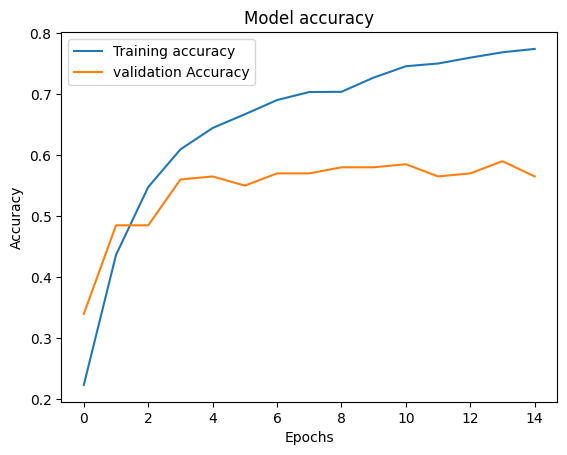

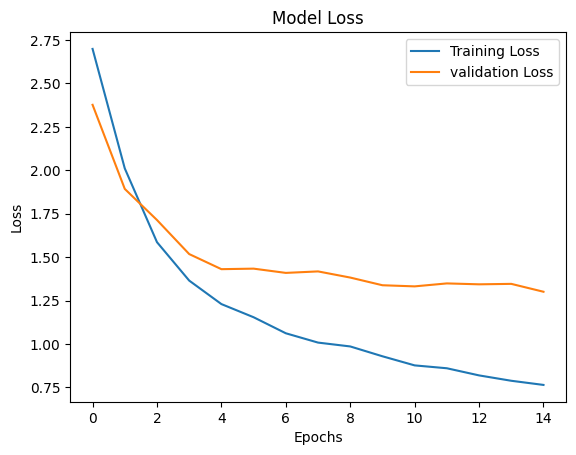

In [12]:
X_test_normalized = X_test / 255.0
results = model.evaluate(X_test_normalized, y_test_encoded)

print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot loss....
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
model.save('my_model.keras')


In [46]:
from google.colab import files
uploaded = files.upload()

Saving 10093.jpg to 10093.jpg


In [47]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

def predict_food_item(image_path, model, class_names):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (160, 160))
    img_normalized = img_resized / 255.0
    img_expanded = np.expand_dims(img_normalized, axis=0)
    predictions = model.predict(img_expanded)
    predicted_class_idx = np.argmax(predictions, axis=1)[0]
    predicted_class = class_names[predicted_class_idx]
    return predicted_class

class_names = [
    'burger', 'butter_naan', 'chai', 'chapati', 'chole_bhature', 'dal_makhani',
    'dhokla', 'fried_rice', 'idli', 'jalebi', 'kathi_roll', 'kadhai_paneer',
    'kulfi', 'masala_dosa', 'momos', 'paani_puri', 'pakode', 'pav_bhaji', 'pizza', 'samosa'
]

model = load_model('my_model.keras')

image_path = input("Please enter the path to the image: ")
predicted_food_item = predict_food_item(image_path, model, class_names)
print(f"The predicted food item is: {predicted_food_item}")


Please enter the path to the image: 10093.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
The predicted food item is: samosa


Finally got an accuracy of 77.42% and upon being tested with a new image it gave correct prediction as illustrated above